In [3]:
# Import Dependencies
from main import DataLoader
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [4]:
from main import OutputFilePhysicianData

In [5]:
physician_data=DataLoader.LoadFile(OutputFilePhysicianData)
physician_data.head()

C:\Users\jules\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,NPI,Individual Pac ID,Last Name,First Name,Gender,Medical School,Graduation Yr,Primary Speciality,Organization Name,Organization Pac ID,...,Address ln 2,ln_2_sprs,City,State,Zip,Phone No.,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score
0,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,GLENVIEW,IL,600261301,NaN,92.6,100.0,40.0,95.6
1,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,Y,GLENVIEW,IL,600261301,NaN,92.6,100.0,40.0,95.6
2,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,HIGHLAND PARK,IL,600352433,8.474328e+09,92.6,100.0,40.0,95.6
3,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,NaN,HIGHALND PARK,IL,600352433,NaN,92.6,100.0,40.0,95.6
4,1003000134,4284706367,CIBULL,THOMAS,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,...,NaN,Y,EVANSTON,IL,602011718,NaN,92.6,100.0,40.0,95.6


In [6]:
# GroupBy Physician Gender
grouped_gender=physician_data.groupby(['Gender'])
avg_gendermips=grouped_gender["Final MIPS Score"].mean()
avg_gendermips

Gender
F    81.508752
M    80.293962
Name: Final MIPS Score, dtype: float64

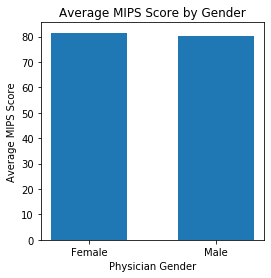

In [7]:
# Create a bar chart based off of the group series 
gender=["Female","Male"]
positions=[0,1]
fig = plt.figure(figsize=(4,4))
plt.bar(positions, avg_gendermips,width=0.6)
plt.xticks(positions,gender,rotation='horizontal')
plt.title("Average MIPS Score by Gender")
plt.xlabel("Physician Gender")
plt.ylabel("Average MIPS Score")
plt.show()

In [ ]:
# GroupBy Medical School

In [12]:
grouped_medschool=physician_data.groupby(['Medical School'])
avg_medschoolmips=grouped_medschool["Final MIPS Score"].mean()
avg_medschoolmips.nlargest(20)

Medical School
ATLANTIC MEDICAL COLLEGE                            100.000000
CENTRAL MEDICAL COLLEGE OF ST. JOSEPH - NLG         100.000000
COLLEGE OF PHYSICIANS AND SURGEONS (TENNESSEE)      100.000000
UNIVERSITY OF WOOSTER MEDICAL DEPARTMENT            100.000000
BEAUMONT HOSPITAL MEDIAL COLLEGE - NLG               99.500000
UNIVERSITY OF ALBERTA FACULTY OF DENTISTRY           99.000000
UNIVERSITY OF COLORADO SCHOOL OF DENTISTRY           99.000000
WILLIAMETTE UNIVERSITY MEDICAL DEPARTMENT            98.600000
FLINT MEDICAL COLLEGE OR NEW ORLEANS UNIVERSITY      98.337500
BALTIMORE UNIVERSITY SCHOOL OF MEDICINE              98.300000
BOWDOIN MEDICAL SCHOOL                               98.125000
UNIV OF MISSOURI-KANSAS CITY SCHOOL OF DENTISTRY     97.266667
UNIV OF BRITISH COLUMBIA FACULTY OF DENTISTRY        97.000000
MEDICAL COLLEGE OF GEORGIA SCHOOL OF DENTISTRY       96.850000
COLLEGE OF PHYSICIANS AND SURGEONS (CALIFORNIA)      96.500000
CHATTANOOGA MEDICAL COLLEGE             

In [19]:
medschoolmips_stat = grouped_medschool["NPI"].describe()
medschoolmips_stat

,count,mean,std,min,25%,50%,75%,max
Medical School,,,,,,,,
"A T STILL UN, ARIZONA SCHL OF DENT.Y & ORAL HLTH",94.0,1.311030e+09,2.975187e+08,1.003090e+09,1.073750e+09,1.154621e+09,1.508121e+09,1.932442e+09
ADIO/PENNSYLVANIA INSTITUTE OF STRAIGHT CHIROPRACTIC,3.0,1.582079e+09,1.341640e+08,1.427160e+09,1.543349e+09,1.659539e+09,1.659539e+09,1.659539e+09
ALBANY MEDICAL COLLEGE OF UNION UNIVERSITY,3970.0,1.504275e+09,2.752262e+08,1.003078e+09,1.265448e+09,1.497782e+09,1.730150e+09,1.992976e+09
ALBERT EINSTEIN COLLEGE OF MEDICINE OF YESHIVA UNIVERSITY,5482.0,1.498567e+09,2.900141e+08,1.003041e+09,1.255317e+09,1.497954e+09,1.750381e+09,1.992961e+09
AMERICAN MEDICAL MISSIONARY COLLEGE,13.0,1.422114e+09,3.568275e+08,1.003859e+09,1.033211e+09,1.316919e+09,1.639158e+09,1.982682e+09
...,...,...,...,...,...,...,...,...
WILLIAMETTE UNIVERSITY MEDICAL DEPARTMENT,2.0,1.184663e+09,0.000000e+00,1.184663e+09,1.184663e+09,1.184663e+09,1.184663e+09,1.184663e+09
WISCONSIN COLLEGE OF PHYSICIANS AND SURGEONS,24.0,1.495502e+09,2.802352e+08,1.104802e+09,1.245229e+09,1.467409e+09,1.720843e+09,1.952545e+09
WOMAN'S MEDICAL COLLEGE,10.0,1.515962e+09,2.084320e+08,1.144545e+09,1.467435e+09,1.477520e+09,1.515398e+09,1.982678e+09


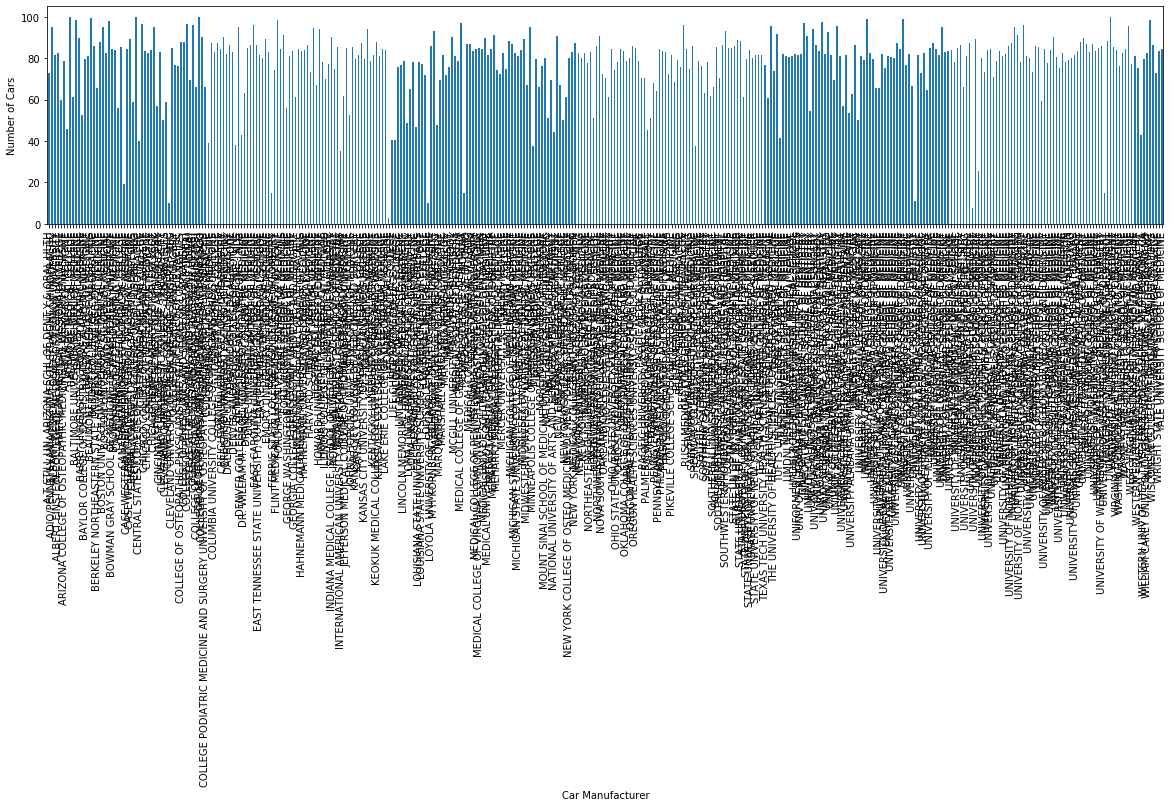

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a bar chart based off of the group series from before
medschool_chart = avg_medschoolmips.plot(kind='bar',figsize=(20,4))

# Set the xlabel and ylabel using class methods
medschool_chart.set_xlabel("Car Manufacturer")
medschool_chart.set_ylabel("Number of Cars")


plt.show()
plt.tight_layout()